### Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

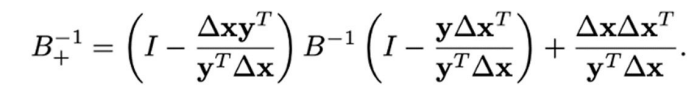

In [2]:
import numpy as np
from numpy.linalg import inv, norm

In [3]:
def bfgs(Df, xk_1, xk, epsilon=0.001, alpha=0.001, n_iter=1000):
    
    I = np.eye(2)
    B_inv = I
    
    for i in range(n_iter):
        
        print("xk_1: \n", xk_1)
        print("---------------------------------")
        print("xk: \n", xk)
        print("---------------------------------")
        print("DF(xk_1): \n", Df(xk_1[0][0], xk_1[1][0]))
        print("---------------------------------")
        print("DF(xk): \n", Df(xk[0][0], xk[1][0]))
        print("---------------------------------")
        print("Norm at iteration {} is: {}".format((i+1), norm(Df(xk_1[0][0], xk_1[1][0]))))
        print("---------------------------------")
        print("B_Inv: \n", B_inv)
        print("*****************************************")
        
        if (norm(Df(xk[0][0], xk[1][0])) < epsilon).all():
            print("Found solution after", i, "iterations.")
            print("xk_1: \n", xk_1)
            print("---------------------------------")
            print("xk: \n", xk)
            print("---------------------------------")
            print("DF(xk_1): \n", Df(xk_1[0][0], xk_1[1][0]))
            print("---------------------------------")
            print("DF(xk): \n", Df(xk[0][0], xk[1][0]))
            print("---------------------------------")
            print("Norm at iteration {} is: {}".format((i+1), norm(Df(xk_1[0][0], xk_1[1][0]))))
            print("---------------------------------")
            print("B_Inv: \n", B_inv)
            print("---------------------------------")
            break
        
        
        x_delta = np.array(xk) - np.array(xk_1)
        y = Df(xk[0][0], xk[1][0]) - Df(xk_1[0][0], xk_1[1][0])
        
        part1 = I - ((x_delta@y.T) / ((y.T)@x_delta))
        part2 = B_inv @ (I - ((y @ (x_delta.T)) / ((y.T) @ x_delta)))
        part3 = (x_delta@x_delta.T) / ((y.T) @ x_delta)
        
        B_inv = part1 @ part2 + part3
        
        
        xk_1 = xk
        xk = xk - alpha * (B_inv @ Df(xk[0][0], xk[1][0]))
    return xk, Df(xk[0][0], xk[1][0])

In [4]:
f = lambda x,y: x**2 + y**2
Df = lambda x, y: np.array([[2*x],
                            [2*y]])

In [5]:
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=1)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[20]
 [20]]
---------------------------------
DF(xk): 
 [[18]
 [18]]
---------------------------------
Norm at iteration 1 is: 28.284271247461902
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[0.]
 [0.]]
---------------------------------
DF(xk_1): 
 [[18]
 [18]]
---------------------------------
DF(xk): 
 [[0.]
 [0.]]
---------------------------------
Norm at iteration 2 is: 25.45584412271571
---------------------------------
B_Inv: 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*****************************************
Found solution after 1 iterations.
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[0.]
 [0.]]
---------------------------------
DF(xk_1): 
 [[18]
 [18]]
---------------------------------
DF(xk): 
 [[0.]
 [0.]]
----------------------------

(array([[0.],
        [0.]]),
 array([[0.],
        [0.]]))

In [6]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=0.9)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[20]
 [20]]
---------------------------------
DF(xk): 
 [[18]
 [18]]
---------------------------------
Norm at iteration 1 is: 28.284271247461902
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[0.9]
 [0.9]]
---------------------------------
DF(xk_1): 
 [[18]
 [18]]
---------------------------------
DF(xk): 
 [[1.8]
 [1.8]]
---------------------------------
Norm at iteration 2 is: 25.45584412271571
---------------------------------
B_Inv: 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*****************************************
xk_1: 
 [[0.9]
 [0.9]]
---------------------------------
xk: 
 [[0.09]
 [0.09]]
---------------------------------
DF(xk_1): 
 [[1.8]
 [1.8]]
---------------------------------
DF(xk): 
 [[0.18]
 [0.18]]
---------------------------------
Norm at ite

(array([[9.e-05],
        [9.e-05]]),
 array([[0.00018],
        [0.00018]]))

In [7]:
# Second function
f = lambda x, y: x**2 + x * y + y**2
Df = lambda x, y: np.array([[(2*x) + y], [x + (2*y)]])

In [8]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=1)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[30]
 [30]]
---------------------------------
DF(xk): 
 [[27]
 [27]]
---------------------------------
Norm at iteration 1 is: 42.42640687119285
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[1.77635684e-15]
 [1.77635684e-15]]
---------------------------------
DF(xk_1): 
 [[27]
 [27]]
---------------------------------
DF(xk): 
 [[5.32907052e-15]
 [5.32907052e-15]]
---------------------------------
Norm at iteration 2 is: 38.18376618407357
---------------------------------
B_Inv: 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*****************************************
Found solution after 1 iterations.
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[1.77635684e-15]
 [1.77635684e-15]]
---------------------------------
DF(xk_1): 
 [[2

(array([[1.77635684e-15],
        [1.77635684e-15]]),
 array([[5.32907052e-15],
        [5.32907052e-15]]))

In [9]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=0.9)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[30]
 [30]]
---------------------------------
DF(xk): 
 [[27]
 [27]]
---------------------------------
Norm at iteration 1 is: 42.42640687119285
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[0.9]
 [0.9]]
---------------------------------
DF(xk_1): 
 [[27]
 [27]]
---------------------------------
DF(xk): 
 [[2.7]
 [2.7]]
---------------------------------
Norm at iteration 2 is: 38.18376618407357
---------------------------------
B_Inv: 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*****************************************
xk_1: 
 [[0.9]
 [0.9]]
---------------------------------
xk: 
 [[0.09]
 [0.09]]
---------------------------------
DF(xk_1): 
 [[2.7]
 [2.7]]
---------------------------------
DF(xk): 
 [[0.27]
 [0.27]]
----------------------

(array([[9.e-05],
        [9.e-05]]),
 array([[0.00027],
        [0.00027]]))

In [10]:
f = lambda x, y: (x**2) * y
Df = lambda x, y: np.array([[(2* x) * y], [x**2]])

In [11]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=1)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[200]
 [100]]
---------------------------------
DF(xk): 
 [[162]
 [ 81]]
---------------------------------
Norm at iteration 1 is: 223.60679774997897
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[4.73684211]
 [4.73684211]]
---------------------------------
DF(xk_1): 
 [[162]
 [ 81]]
---------------------------------
DF(xk): 
 [[44.87534626]
 [22.43767313]]
---------------------------------
Norm at iteration 2 is: 181.12150617748296
---------------------------------
B_Inv: 
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*****************************************
xk_1: 
 [[4.73684211]
 [4.73684211]]
---------------------------------
xk: 
 [[3.10344828]
 [3.10344828]]
---------------------------------
DF(xk_1): 
 [[44.87534626]
 [22.43767313]]
---

(array([[0.01534004],
        [0.01534004]]),
 array([[0.00047063],
        [0.00023532]]))

In [12]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001 and learning_rate = 0.9
bfgs(Df, [[10], [10]], [[9], [9]], epsilon=0.001, alpha=0.9)

xk_1: 
 [[10], [10]]
---------------------------------
xk: 
 [[9], [9]]
---------------------------------
DF(xk_1): 
 [[200]
 [100]]
---------------------------------
DF(xk): 
 [[162]
 [ 81]]
---------------------------------
Norm at iteration 1 is: 223.60679774997897
---------------------------------
B_Inv: 
 [[1. 0.]
 [0. 1.]]
*****************************************
xk_1: 
 [[9], [9]]
---------------------------------
xk: 
 [[5.16315789]
 [5.16315789]]
---------------------------------
DF(xk_1): 
 [[162]
 [ 81]]
---------------------------------
DF(xk): 
 [[53.31639889]
 [26.65819945]]
---------------------------------
Norm at iteration 2 is: 181.12150617748296
---------------------------------
B_Inv: 
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*****************************************
xk_1: 
 [[5.16315789]
 [5.16315789]]
---------------------------------
xk: 
 [[3.4691586]
 [3.4691586]]
---------------------------------
DF(xk_1): 
 [[53.31639889]
 [26.65819945]]
-----

(array([[0.01834551],
        [0.01834551]]),
 array([[0.00067312],
        [0.00033656]]))